In [1]:
# Importing required libraries

import pandas as pd
import psycopg2
import psycopg2.extensions
import sqlalchemy
from sqlalchemy import create_engine
%matplotlib inline

In [24]:
# Create connection to Database

conn = psycopg2.connect(
    database='Your-Data-Base',
    user='Your-User-Name',
    password='Your-User-Pass',
    host='localhost',
    port='5432'
)
print('Connected to Postgres DB')

Connected to Postgres DB


In [3]:
cur = conn.cursor()

In [4]:
# List ALL Available Tables in DB

tables = pd.read_sql_query("select * "
                        "from pg_catalog.pg_tables "
                        "where schemaname != 'pg_catalog' and schemaname != 'information_schema'"
                        , conn)
tables.head()

schemaname tablename tableowner tablespace  hasindexes  hasrules  \
0     public       dax   postgres       None       False     False   
1     public       dow   postgres       None       False     False   
2     public     stoxx   postgres       None       False     False   
3     public     cac40   postgres       None        True     False   
4     public     sp500   postgres       None       False     False   

   hastriggers  rowsecurity  
0        False        False  
1        False        False  
2        False        False  
3        False        False  
4        False        False

In [5]:
# Load data table to review available information sorting by Date column in ascending order

df = pd.read_sql_query('select * from cac40 order by "Date" asc', conn)

df.head()

Date         Open         High          Low        Close  \
0  2014-11-03  4225.810059  4238.459961  4185.410156  4194.029785   
1  2014-11-03    26.049999    26.049999    26.049999    26.049999   
2  2014-11-04    25.500000    25.500000    25.500000    25.500000   
3  2014-11-04  4177.200195  4208.520020  4118.500000  4130.189941   
4  2014-11-05  4163.509766  4214.350098  4145.609863  4208.419922   

     Adj_Close       Volume  
0  4194.029785  123590300.0  
1    23.429771        200.0  
2    22.935097       2500.0  
3  4130.189941  142148700.0  
4  4208.419922  126747900.0

In [6]:
# Load data table to review available data with Volume larger than the specified amount

df = pd.read_sql_query('select * '
                       'from cac40 '
                       'where "Volume" > 600000', conn)
df.head(10)

Date         Open         High          Low        Close  \
0  2014-11-03  4225.810059  4238.459961  4185.410156  4194.029785   
1  2014-11-04  4177.200195  4208.520020  4118.500000  4130.189941   
2  2014-11-05  4163.509766  4214.350098  4145.609863  4208.419922   
3  2014-11-06  4193.479980  4275.299805  4180.319824  4227.680176   
4  2014-11-07  4238.870117  4239.560059  4161.149902  4189.890137   
5  2014-11-10  4184.180176  4224.830078  4174.979980  4222.819824   
6  2014-11-11  4227.120117  4252.919922  4223.680176  4244.100098   
7  2014-11-12  4232.339844  4242.620117  4175.290039  4179.879883   
8  2014-11-13  4203.669922  4220.740234  4153.169922  4187.950195   
9  2014-11-14  4208.109863  4208.129883  4164.790039  4202.459961   

     Adj_Close       Volume  
0  4194.029785  123590300.0  
1  4130.189941  142148700.0  
2  4208.419922  126747900.0  
3  4227.680176  163811600.0  
4  4189.890137  144094600.0  
5  4222.819824  123847500.0  
6  4244.100098   99662200.0  
7  4179.879883  122989000.0  
8  4187.950195  131579800.0  
9  4202.459961  109621000.0

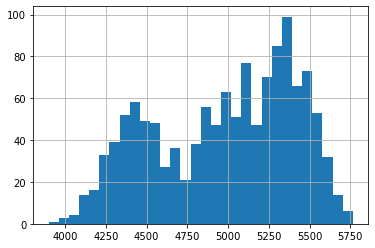

In [7]:
# Display Volume histogram

df.Adj_Close.hist(bins=30)

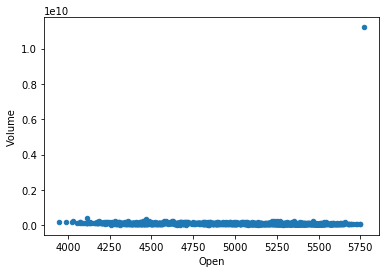

In [8]:
# Display Scatter plot

df.plot.scatter(x='Open', y='Volume')

In [9]:
# re-labeling headers to maintain related table-data together

df = df.rename(columns={'Open':'CAC40_Open', 'High':'CAC40_High', 'Low':'CAC40_Low', 'Close':'CAC40_Close', 'Adj_Close':'CAC40_Adj_Close', 'Volume':'CAC40_Volume'})
df.head()

Date   CAC40_Open   CAC40_High    CAC40_Low  CAC40_Close  \
0  2014-11-03  4225.810059  4238.459961  4185.410156  4194.029785   
1  2014-11-04  4177.200195  4208.520020  4118.500000  4130.189941   
2  2014-11-05  4163.509766  4214.350098  4145.609863  4208.419922   
3  2014-11-06  4193.479980  4275.299805  4180.319824  4227.680176   
4  2014-11-07  4238.870117  4239.560059  4161.149902  4189.890137   

   CAC40_Adj_Close  CAC40_Volume  
0      4194.029785   123590300.0  
1      4130.189941   142148700.0  
2      4208.419922   126747900.0  
3      4227.680176   163811600.0  
4      4189.890137   144094600.0

In [10]:
# Load second data table to review available information sorting by "Date" in ascending order

df2 = pd.read_sql_query('select * '
                        'from dax '
                        'order by "Date" ASC', conn)
df2.head()

Date       Open       High        Low      Close  Adj_Close  Volume
0  2014-11-03  26.049999  26.049999  26.049999  26.049999  23.429771   200.0
1  2014-11-04  25.500000  25.500000  25.500000  25.500000  22.935097  2500.0
2  2014-11-05  25.639999  25.639999  25.639999  25.639999  23.061012   300.0
3  2014-11-06  25.559999  25.559999  25.559999  25.559999  22.989059   200.0
4  2014-11-07  25.459999  25.459999  25.459999  25.459999  22.899120   100.0

In [11]:
# Load data table to review available data with Volume larger than the specified amount

df2 = pd.read_sql_query('select * '
                        'from dax '
                        'where "Volume" > 30000', conn)
df2.head(10)

Date       Open       High        Low      Close  Adj_Close    Volume
0  2015-01-22  26.209999  26.440001  26.177999  26.320000  23.672617   93600.0
1  2015-01-23  26.870001  26.870001  26.230000  26.230000  23.591669  106100.0
2  2015-01-29  26.480000  27.000000  26.480000  26.973000  24.259933   35300.0
3  2015-02-03  27.889999  27.889999  27.389999  27.667999  24.885025   52300.0
4  2015-02-04  27.670000  27.670000  27.030001  27.139999  24.410133   80800.0
5  2015-02-06  27.360001  27.360001  26.732000  26.830000  24.131315   30600.0
6  2015-02-13  28.000000  28.000000  27.430000  27.549999  24.778896   56200.0
7  2015-02-17  27.879999  27.879999  27.200001  27.372999  24.619699   57100.0
8  2015-02-24  27.860001  28.020000  27.670000  27.972000  25.158449   32800.0
9  2015-03-02  28.559999  28.559999  27.784000  28.129999  25.300558   37700.0

In [12]:
# re-labeling headers to maintain related table-data together

df2 = df2.rename(columns=
                 {'Open':'DAX_Open', 'High':'DAX_High', 'Low':'DAX_Low', 'Close':'DAX_Close', 
                  'Adj_Close':'DAX_Adj_Close', 'Volume':'DAX_Volume'})
df2.head()

Date   DAX_Open   DAX_High    DAX_Low  DAX_Close  DAX_Adj_Close  \
0  2015-01-22  26.209999  26.440001  26.177999  26.320000      23.672617   
1  2015-01-23  26.870001  26.870001  26.230000  26.230000      23.591669   
2  2015-01-29  26.480000  27.000000  26.480000  26.973000      24.259933   
3  2015-02-03  27.889999  27.889999  27.389999  27.667999      24.885025   
4  2015-02-04  27.670000  27.670000  27.030001  27.139999      24.410133   

   DAX_Volume  
0     93600.0  
1    106100.0  
2     35300.0  
3     52300.0  
4     80800.0

In [13]:
# Create new dataframe by joining tables using "Date" as primary key

newdf = df.merge(df2, on='Date', how='inner')
newdf.head()

Date   CAC40_Open   CAC40_High    CAC40_Low  CAC40_Close  \
0  2015-01-22  4486.759766  4569.549805  4462.169922  4552.799805   
1  2015-01-23  4588.490234  4673.299805  4585.640137  4640.689941   
2  2015-01-29  4571.049805  4632.379883  4571.049805  4631.430176   
3  2015-02-03  4651.069824  4701.520020  4645.149902  4677.899902   
4  2015-02-04  4682.810059  4696.299805  4651.779785  4696.299805   

   CAC40_Adj_Close  CAC40_Volume   DAX_Open   DAX_High    DAX_Low  DAX_Close  \
0      4552.799805   208073500.0  26.209999  26.440001  26.177999  26.320000   
1      4640.689941   222514400.0  26.870001  26.870001  26.230000  26.230000   
2      4631.430176   117222200.0  26.480000  27.000000  26.480000  26.973000   
3      4677.899902   146301200.0  27.889999  27.889999  27.389999  27.667999   
4      4696.299805   130750800.0  27.670000  27.670000  27.030001  27.139999   

   DAX_Adj_Close  DAX_Volume  
0      23.672617     93600.0  
1      23.591669    106100.0  
2      24.259933     35300.0  
3      24.885025     52300.0  
4      24.410133     80800.0

In [14]:
# Create a table in PostgreSQL database
# New table called "master" in data base containing the newly created data-set

name_Table = "master"

# Create table statement

NewTable = "create table "+name_Table+"(Date DATE NOT NULL, CAC40_Open double precision,CAC40_High double precision, CAC40_Low double precision, CAC40_Close double precision, CAC40_Adj_Close double precision, CAC40_Volume numeric, DAX_Open double precision, DAX_High double precision, DAX_Low double precision, DAX_Close double precision, DAX_Adj_Close double precision, DAX_Volume numeric);"

cur.execute(NewTable)

conn.commit()

In [15]:
# List ALL Available Tables in DB

tables = pd.read_sql_query("select * "
                        "from pg_catalog.pg_tables "
                        "where schemaname != 'pg_catalog' and schemaname != 'information_schema'"
                        , conn)
tables.head(8)

schemaname tablename tableowner tablespace  hasindexes  hasrules  \
0     public       dax   postgres       None       False     False   
1     public       dow   postgres       None       False     False   
2     public     stoxx   postgres       None       False     False   
3     public     cac40   postgres       None        True     False   
4     public     sp500   postgres       None       False     False   
5     public    master   postgres       None       False     False   

   hastriggers  rowsecurity  
0        False        False  
1        False        False  
2        False        False  
3        False        False  
4        False        False  
5        False        False

We can see on Line 5 of our output, the new table called "master" was created

In [16]:
# List contents of the new created table

df3 = pd.read_sql_query('select * '
                        'from master ', conn)
df3.head()

Empty DataFrame
Columns: [date, cac40_open, cac40_high, cac40_low, cac40_close, cac40_adj_close, cac40_volume, dax_open, dax_high, dax_low, dax_close, dax_adj_close, dax_volume]
Index: []

It is clear that we have an empty table, thus we'll now load the data

In [17]:
# Update records with hard-copy of our new data-set

newdf.to_csv('/Users/Luchano/Documents/SQL/master.csv', index = False)

In [18]:
# Update Postgresql database master with new-data-frame information

with open('/Users/Luchano/Documents/SQL/master.csv', 'r') as f:
    next(f) # Skip the header row.
    cur.copy_from(f, 'master', sep=',')
    conn.commit()

In [19]:
# List updated table contents of the new "master" table 

master = pd.read_sql_query('select * '
                        'from master ', conn)
master.head()

date   cac40_open   cac40_high    cac40_low  cac40_close  \
0  2015-01-22  4486.759766  4569.549805  4462.169922  4552.799805   
1  2015-01-23  4588.490234  4673.299805  4585.640137  4640.689941   
2  2015-01-29  4571.049805  4632.379883  4571.049805  4631.430176   
3  2015-02-03  4651.069824  4701.520020  4645.149902  4677.899902   
4  2015-02-04  4682.810059  4696.299805  4651.779785  4696.299805   

   cac40_adj_close  cac40_volume   dax_open   dax_high    dax_low  dax_close  \
0      4552.799805   208073500.0  26.209999  26.440001  26.177999  26.320000   
1      4640.689941   222514400.0  26.870001  26.870001  26.230000  26.230000   
2      4631.430176   117222200.0  26.480000  27.000000  26.480000  26.973000   
3      4677.899902   146301200.0  27.889999  27.889999  27.389999  27.667999   
4      4696.299805   130750800.0  27.670000  27.670000  27.030001  27.139999   

   dax_adj_close  dax_volume  
0      23.672617     93600.0  
1      23.591669    106100.0  
2      24.259933     35300.0  
3      24.885025     52300.0  
4      24.410133     80800.0